# Решение задач классификации.

* Порешаем теоретические задачи на логистическую регрессию и персептрон.
* Научимся решать линейные и нелинейные задачи классификации с логистической регрессии.
* Разберём, как подбирать гиперпараметры моделей по сетке.
* Потренируемся применять пайплайны.

## Решение теоретических задач

**Задание 1**. Рассмотрим простейший персептрон с константой, одним входом $x_1$ и пороговой функцией активации. Подберите веса так, чтобы перептрон реализовывал логическое отрицание (в ответ на 0 выдавал 1 и наоборот).


**Задание 2**. Рассмотрим простейший персептрон с константой, двумя входами $x_1$ и $x_2$ и пороговой функцией активации.
- подберите веса так, чтобы персептрон реализовывал логическое ИЛИ. / если хотя б один единица, то 1, если все нули, то 0
- докажите, что невозможно подобрать веса так, чтобы персептрон реализовывал исключающее логическое ИЛИ (XOR). x1=x2=0^ а их логическое сложение 0, x1=1 x2=0 -> 1, x1=0 x2=1 -> 1, x1=x2=1 -> 0. Связь нелинейная, поэтому линейной функцией это никак не отделить
- придумайте, какой признак можно добавить на вход персептрону, чтобы можно было реализовать XOR. Подберите веса. 






**Задание 3**. Рассмотрим логистическую регрессию в задаче предсказания целевой переменной по двум признакам: $a(x)=\sigma(w_0+w_1\cdot x_1 +w_2\cdot x_2)$.

После оценки качества алгоритма по кросс-валидации выяснилось, что модель переобучилась. Какие из нижеперечисленных подходов корректно описаны и их можно предпринять для уменьшения переобучения?

1) Уберём константный коэффициент $w_0$, так как он увеличивает сложность модели и при этом не влияет на обобщающую способность модели !!! не можем убрать, так как он влияет на результат модели и на ее обобщающую способность. И видимо его влияние будет запихиваться в другие переменные, которые по факту не объясняются этим изменением

2) Добавим к модели регуляризатор $w_0^2 +w_1^2 +w_2^2$, так как l2-регуляризация может уменьшить переобучение

3) Добавим к модели регуляризатор вида $|w_1|+|w_2|$, так как l1-регуляризация может уменьшить переобучение

4) Добавим к модели регуляризатор вида $[w_1\neq 0]+[w_2\neq 0]$, так как l0-регуляризация может уменьшить переобучение (здесь [x] = 1, если выражение x верно, а иначе 0)

5) Добавим полиномиальных признаков второй степени, чтобы увеличить обобщающую способность модели. !!! Мы уже на этих признаках переобучились. Если добавить полиномы этих признаков, то вообще будет пиздец ещё большее переобучение


**Задание 3**.

Покажите, что квадратичная функция потерь $L(y, z) = ([y = +1]−z)^2$
позволяет предсказывать корректные вероятности.
Нам надо, чтобы функция потерь

**Задание 5**. ![Задание 5](задача2.png)

In [2]:
#Проверяем математические выкладки задачи 5
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.array([(1, 1)]*12 + [(1, 0)] * 36 + [(0, 1)]*32 + [(0, 0)] * 20)
X, y = X[:,0].reshape(-1, 1), X[:,1]

lr = LogisticRegression(penalty=None)
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([[-1.56862252]]), array([0.47000341]))

In [3]:
lr.predict_proba([[0]])

array([[0.38461544, 0.61538456]])

##  Задача 1: многоклассовая классификация цветков ириса.

![Ирисы](irises.jpg)

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import load_iris # датасет предсказания вида цветочка. тут у нас три вида, то есть не просто 0 или 1.

iris = load_iris()

X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

Выведите на экран все различные значения целевой переменной, а также распределение классов

In [11]:
#your code here
np.unique(y)

array([0, 1, 2])

In [12]:
from collections import Counter

Counter(y) # смотрим на сбалансированность

Counter({0: 50, 1: 50, 2: 50})

Для решения этой задачи будем использовать **линейную модель - логистическую регрессию**.

Для начала разобъем данные на train и test (test - 20% от всех данных).

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, \
                                               random_state=1)

Обучим логистическую регрессию на train и выведем качество (accuracy) на train и на test.

In [14]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(Xtrain, ytrain)

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

accuracy_score(ytrain,pred_train), accuracy_score(ytest,pred_test) # аккураси высокая даже на тесте, видимо датасет простой и реально предсказать можно вид ириса по длине

(0.9833333333333333, 0.9666666666666667)

Посмотрим на качество алгоритма на кросс-валидации.

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=7, scoring='accuracy')

array([0.95454545, 1.        , 0.90909091, 0.95238095, 0.95238095,
       1.        , 1.        ])

Получили очень высокую долю правильных ответов модели.

Посмотрим, можно ли улучшить качество модели **подбором её гиперпараметров**. Логистическая регрессия имеет гиперпараметр C - подберём его.

* Подбор гиперпараметров традиционно осуществляется "по сетке" с помощью функции ***GridSearchCV***.

GridSearchCV - это класс, который ищет с помощью кросс-валидации (CV) по сетке наилучшую комбинацию искомых параметров.

*За что отвечает гиперпараметр С?*

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(0.1,1.1,0.1)}
grid = GridSearchCV(model, params)

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

best score: 0.9733333333333334
best params: {'C': 1.0}


Задача уже решена очень хорошо. На этом можно ставить точку.

## Задача 2: задача XOR.

![How it works](XOR.png)

Создадим данные для задачи XOR

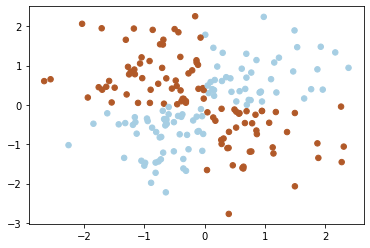

In [16]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

Будем использовать функцию, которая рисует разделяющую границу, проведенную классификатором.

In [17]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

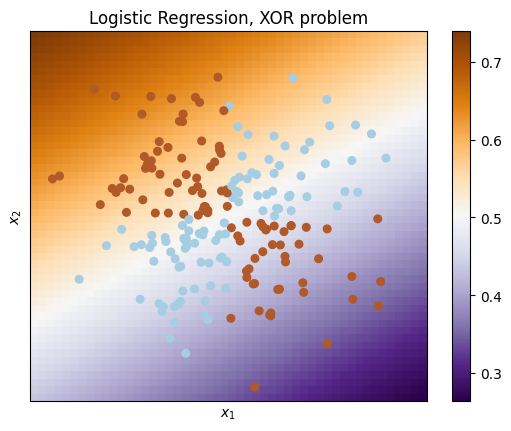

In [13]:
plot_boundary(LogisticRegression(solver='lbfgs'), X, y, "Logistic Regression, XOR problem")

Оценим качество полученной классификации. Как виднно, она как-то плохо поделила. Часть синих засунула к коричневым, часть коричневых - к синим

In [14]:
cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()

0.4997738579828132

Мы видим, что задача решена плохо. Попробуем подобрать гиперпараметр C в логистической регрессии.

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'C': np.arange(0.1,1.1,0.1)}
grid = GridSearchCV(model, params)

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

best score: 0.5349999999999999
best params: {'C': 0.5}


Видим, что подбор гиперпараметра не помог, и задача всё ещё решена плохо. Получается, что линейный классификатор (а именно, логистическая регрессия), плохо решает эту задачу. Это и понятно, ведь *данные нелинейные*.

Попробуем добавить в качестве признаков полиномиальные признаки степени 2.

Теперь у нас будут признаки не только $(1, x_1, x_2)$, но и $1, x_1, x_2, x_1^2, x_1x_2, x_2^2$.

Будем использовать удобную функцию *Pipeline* для описания модели.

***Pipeline***.
* С помощью Pipeline можно соорудить модель, в которой кроме непосредственно применения некоторого алгоритма происходит какая-либо обработка данных.
* В нашей задаче необходимо сначала извлечь полиномиальные признаки, а затем обучить логистическую регрессию. Эти два действия можно осуществить внутри одной "комбинированной" модели с помощью Pipeline.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('logit', LogisticRegression())])

Сразу найдем оптимальное значение гиперпараметра C с помощью GridSearchCV и оценим качество модели (на кросс-валидации).

In [21]:
params = {'logit__C': np.arange(0.1,1.1,0.1)}
grid = GridSearchCV(logit_pipe, params, cv=3)

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

best score: 0.9301974973616765
best params: {'logit__C': 0.30000000000000004}


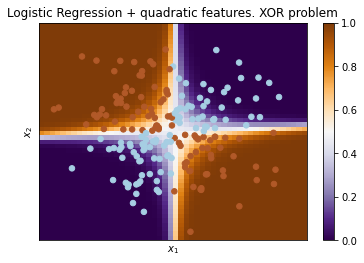

In [22]:
plot_boundary(logit_pipe, X, y,
              "Logistic Regression + quadratic features. XOR problem")

* **Таким образом, при добавлении новых нелинейных признаков с помощью линейного классификатора можно решить линейно неразделимую задачу.**

* **Другой способ решить такую задачу - сразу использовать нелинейные классификаторы (попробуем на следующих семинарах).**